a = 23.990, b = 0.536, c = 0.059
R-squared = 0.992
./approximate/16.png written successfully!


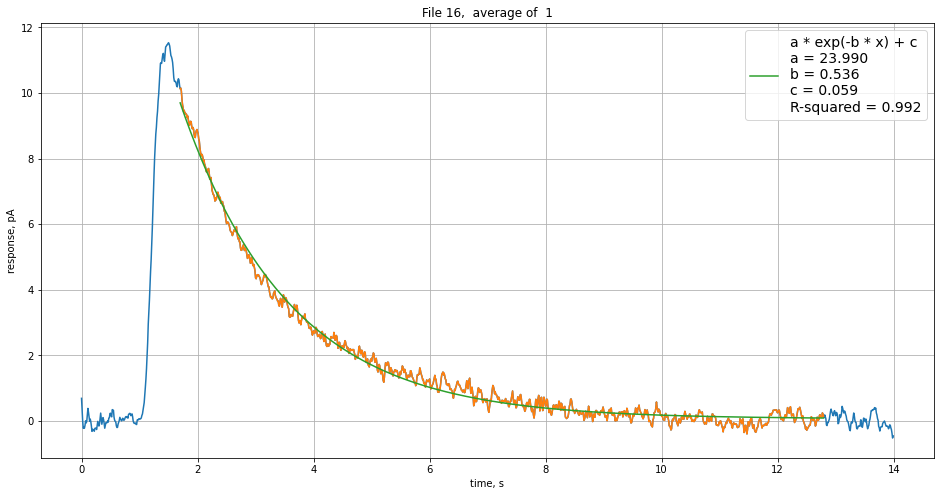

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, optimize


def func(x, a, b, c):
    return a * np.exp(-b * x) + c


input_dir = './approximate/'
filename = '16.asc'
left = 1.7
right = 12.8
time_resolution = 0.01

with open(input_dir + filename, 'r', encoding='utf-8') as inf:
    title = inf.readline().strip()
    v = [float(_.strip()) for _ in inf.readlines()]

left = int(left / time_resolution)
right = int(right / time_resolution)
n = len(v)
v = np.array(v)
t = np.linspace(0, (n - 1) * time_resolution, n)
y = v[left:right]
x = t[left:right]

popt, pcov = optimize.curve_fit(func, x, y, [1, 0, 0])
print(f'a = {popt[0]:.3f}, b = {popt[1]:.3f}, c = {popt[2]:.3f}')
fit = func(x, *popt)
rvalue = stats.linregress(y, fit).rvalue
print(f'R-squared = {rvalue ** 2:.3f}')

fig, ax = plt.subplots()
ax.plot(t, v)
ax.plot(x, y)
ax.plot(x, fit, label=f'a * exp(-b * x) + c\n'
                      f'a = {popt[0]:.3f}\n'
                      f'b = {popt[1]:.3f}\n'
                      f'c = {popt[2]:.3f}\n'
                      f'R-squared = {rvalue ** 2:.3f}')
fig.set_figwidth(16)
fig.set_figheight(8)
ax.set_xlabel('time, s')
ax.set_ylabel('response, pA')
ax.set_title(title)
ax.legend(prop={"size": 14})
ax.grid()
plt.savefig(f'{input_dir + filename[:-4]}.png')
print(f'{input_dir + filename[:-4]}.png written successfully!')